# Modele CNN

## Import des librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

2023-04-28 10:19:07.337113: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-04-28 10:19:07.408566: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-28 10:19:07.988923: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-28 10:19:07.998375: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-28 10:19:09.782882: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

## Import des DataFrames

In [2]:
df = pd.read_csv("data/train.csv")
df_test = pd.read_csv("data/test.csv")

## Visualisation du dataset

In [3]:
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


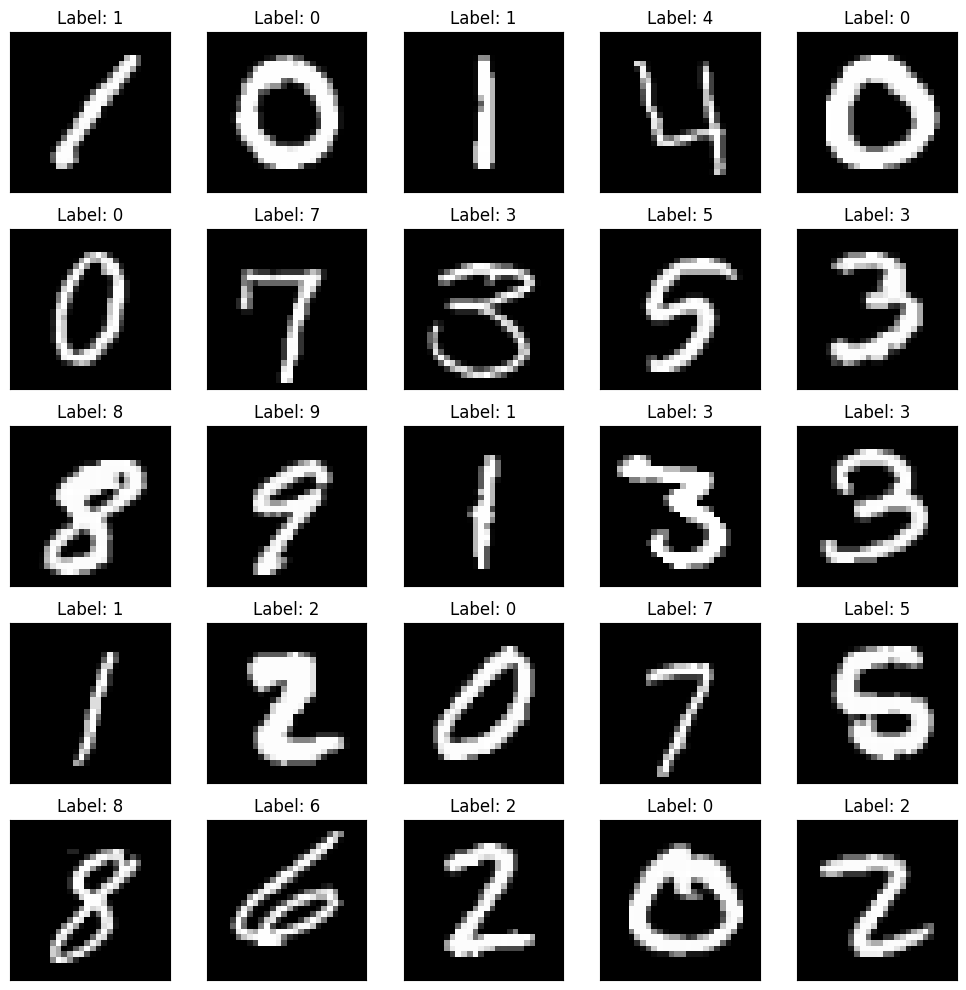

In [4]:
# Séparation des colonnes de données d'images et de labels
X = df.drop("label", axis=1).values.astype('float32')
y = df["label"].values.astype('int32')
print(X)
X = X.reshape(-1, 28, 28, 1) / 255.0
# Affichage des 25 premières images
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10, 10))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(X[i], cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f"Label: {y[i]}")
plt.tight_layout()
plt.show()

## Baseline CNN

2023-04-28 10:19:29.050800: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-04-28 10:19:29.054844: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Epoch 1/10
525/525 [==============================] - 10s 16ms/step - loss: 0.2350 - accuracy: 0.9282 - val_loss: 0.0791 - val_accuracy: 0.9742
Epoch 2/10
525/525 [==============================] - 7s 14ms/step - loss: 0.0615 - accuracy: 0.9815 - val_loss: 0.0538 - val_accuracy: 0.9829
Epoch 3/10
525/525 [==============================] - 8s 14ms/step - loss: 0.0420 - accuracy: 0.9870 - val_loss: 0.0444 - val_accuracy: 0.9871
Epoch 4/10
525/525 [==============================] - 7s 14ms/step - loss: 0.0303 - accuracy: 0.9902 - val_loss: 0.0442 - val_accuracy: 0.9869
Epoch 5/10
525/525 [==============================] - 8s 15ms/step - loss: 0.0244 - accuracy: 0.9923 - val_loss: 0.0436 - val_accuracy: 0.9876
Epoch 6/10
525/525 [==============================] - 8s 14ms/step - loss: 0.0189 - accuracy: 0.9940 - val_loss: 0.0621 - val_accuracy: 0.9842
Epoch 7/10
525/525 [==============================] - 8s 14ms/step - loss: 0.0176 - accuracy: 0.9945 - val_loss: 0.0554 - val_accuracy: 0.987

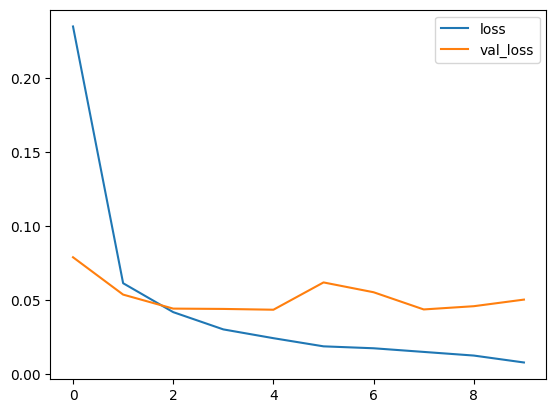

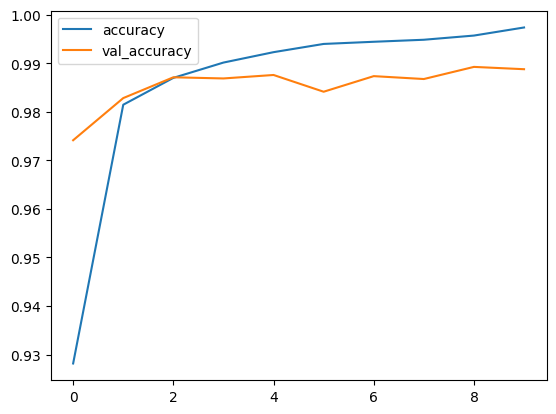

In [5]:


# Création du modèle
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),

    layers.Flatten(),
    
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X, y, epochs=10, batch_size=64, validation_split=0.2)

history_frame = pd.DataFrame(history.history)

history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot();

In [6]:
history_frame

,loss,accuracy,val_loss,val_accuracy
0,0.234964,0.928155,0.079070,0.974167
1,0.061541,0.981488,0.053847,0.982857
2,0.042002,0.987024,0.044382,0.987143
3,0.030344,0.990179,0.044167,0.986905
4,0.024407,0.992321,0.043631,0.987619
5,0.018896,0.994018,0.062071,0.984167
6,0.017592,0.994464,0.055435,0.987381
7,0.015129,0.994881,0.043822,0.986786
8,0.012668,0.995744,0.046010,0.989286
9,0.007996,0.997411,0.050471,0.988810


## Enregistrement du modele

In [7]:
model.save("CNN.h5")


## Essaie du modele sur le dataset test

In [8]:
from tensorflow.keras.models import load_model
df_test = pd.read_csv("data/test.csv")
model = load_model('CNN.h5')

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
df_test = df_test.values.astype('float32')

df_test = df_test.reshape(-1, 28, 28, 1) / 255.0


In [10]:

predictions = model.predict(df_test)

# Obtenir les noms de classe prédits
predicted_class_indices = np.argmax(predictions, axis=1)
labels = ["0","1","2","3","4","5","6","7","8","9"]
predicted_classes = [labels[k] for k in predicted_class_indices]


875/875 [==============================] - 4s 4ms/step


In [13]:
import random

# Sélectionner 10 images au hasard avec leur prédiction
random.seed()
indices = random.sample(range(len(predicted_classes)), 10)
selected_images = [df_test[i] for i in indices]
selected_predictions = [predicted_classes[i] for i in indices]


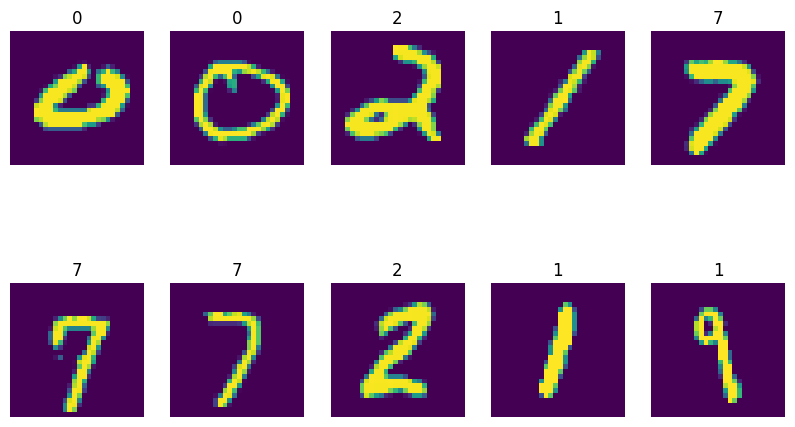

In [14]:
from PIL import Image

# Afficher les 10 images sélectionnées avec leur prédiction
fig, axes = plt.subplots(2, 5, figsize=(10, 6))
for i, ax in enumerate(axes.flat):
    img =selected_images[i]
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(selected_predictions[i])
plt.show()
